In [1]:
import warnings
warnings.filterwarnings("ignore")

import env
import Liam_wrangle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import viz_kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
train = pd.read_csv('train_zillow.csv')

In [3]:
def cluster(train):

    X = train[['quality', 'house_age', 'room_count']]

    scaler = StandardScaler().fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

    from sklearn.cluster import KMeans
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
   
    #define the thing
    kmeans = KMeans(n_clusters=5)

    # fit the thing
    kmeans.fit(X_scaled)

    # Use (predict using) the thing 
    kmeans.predict(X_scaled)
    # Make a dataframe 
    
    train['quality_houseage_roomcount_cluster'] = kmeans.predict(X_scaled)

    X_scaled['quality_houseage_roomcount_cluster'] = kmeans.predict(X_scaled)

    # Cluster Centers aka (centroids)
    kmeans.cluster_centers_
    
    centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

    # lets visualize the clusters along with the centers on (scaled data).

    plt.figure(figsize=(20, 40))

    # scatter plot of data with hue for cluster
    plt.subplot(5,1,1)
    sns.scatterplot(x = 'quality', y= 'room_count', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
    centroids_scaled.plot.scatter(x = 'room_count', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


    plt.subplot(5,1,2)
    sns.scatterplot(x = 'house_age', y= 'quality', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
    centroids_scaled.plot.scatter(x = 'house_age', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


    plt.subplot(5,1,3)
    sns.scatterplot(x = 'house_age', y= 'room_count', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
    centroids_scaled.plot.scatter(x = 'house_age', y = 'room_count', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


    plt.legend();

    # lets visualize the clusters along with the centers on (scaled data).

    plt.figure(figsize=(14, 9))

    # scatter plot of data with hue for cluster

    sns.relplot(x = 'house_age', y= 'quality', data = X_scaled, col = X_scaled.quality_houseage_roomcount_cluster, col_wrap = 2, hue = train.level_of_log_error)

    # plot cluster centers (centroids)

    # centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

    plt.show();
    return X_scaled

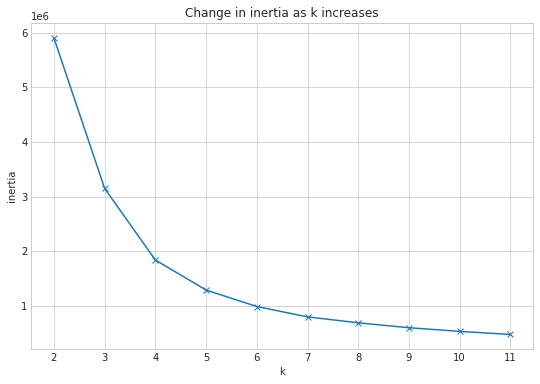

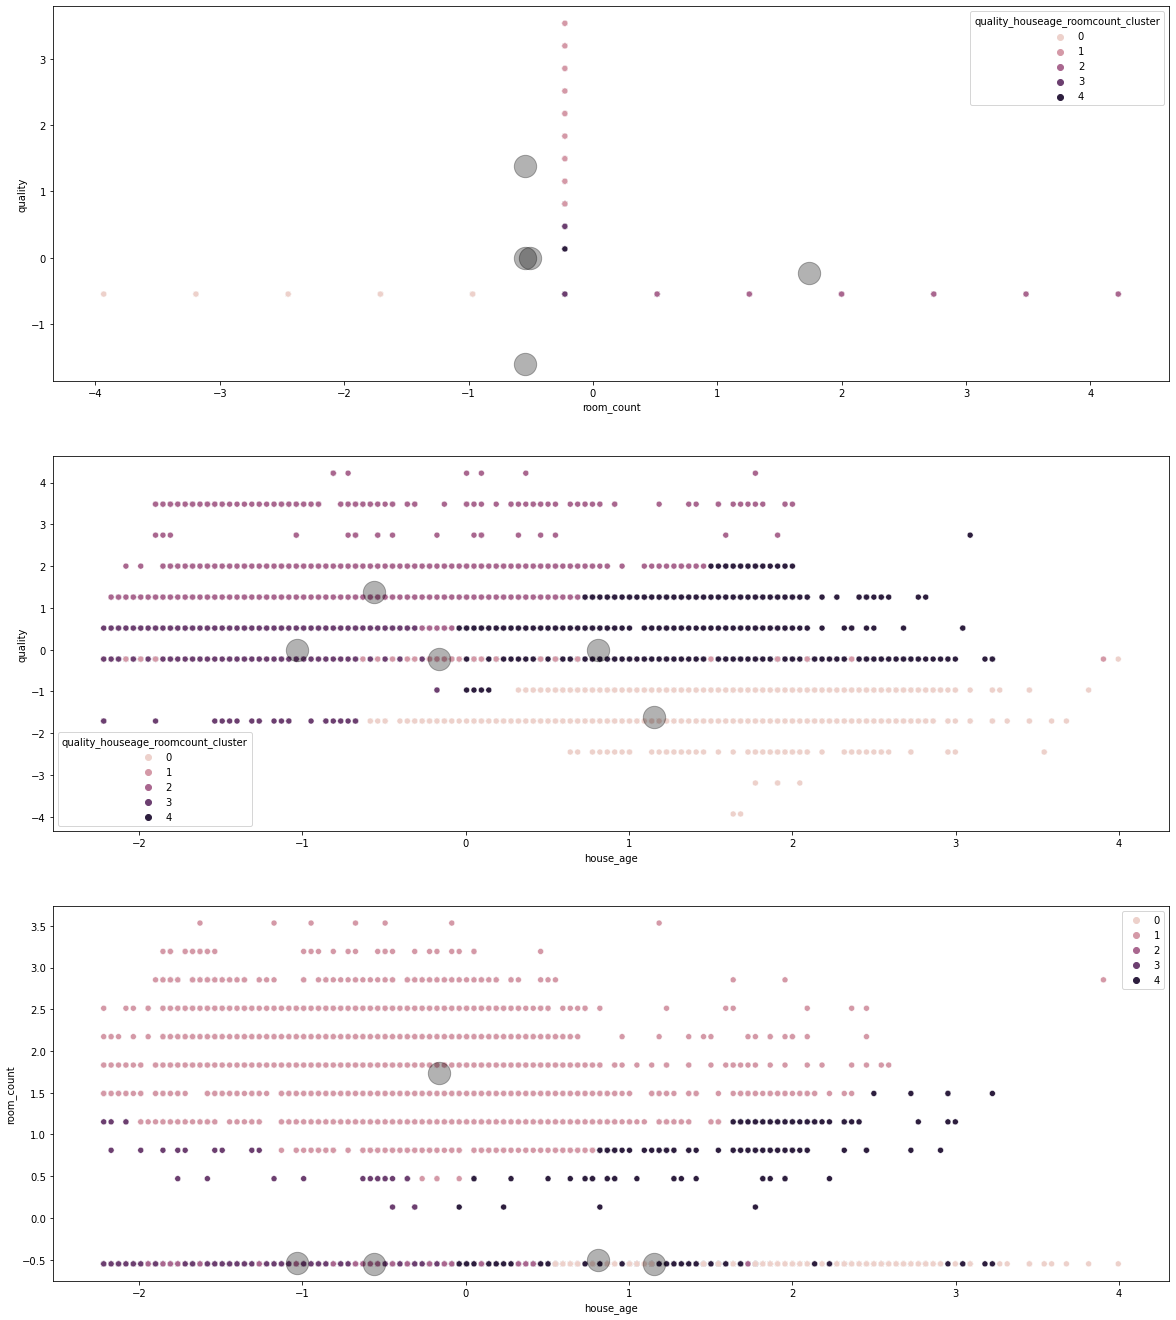

<Figure size 1008x648 with 0 Axes>

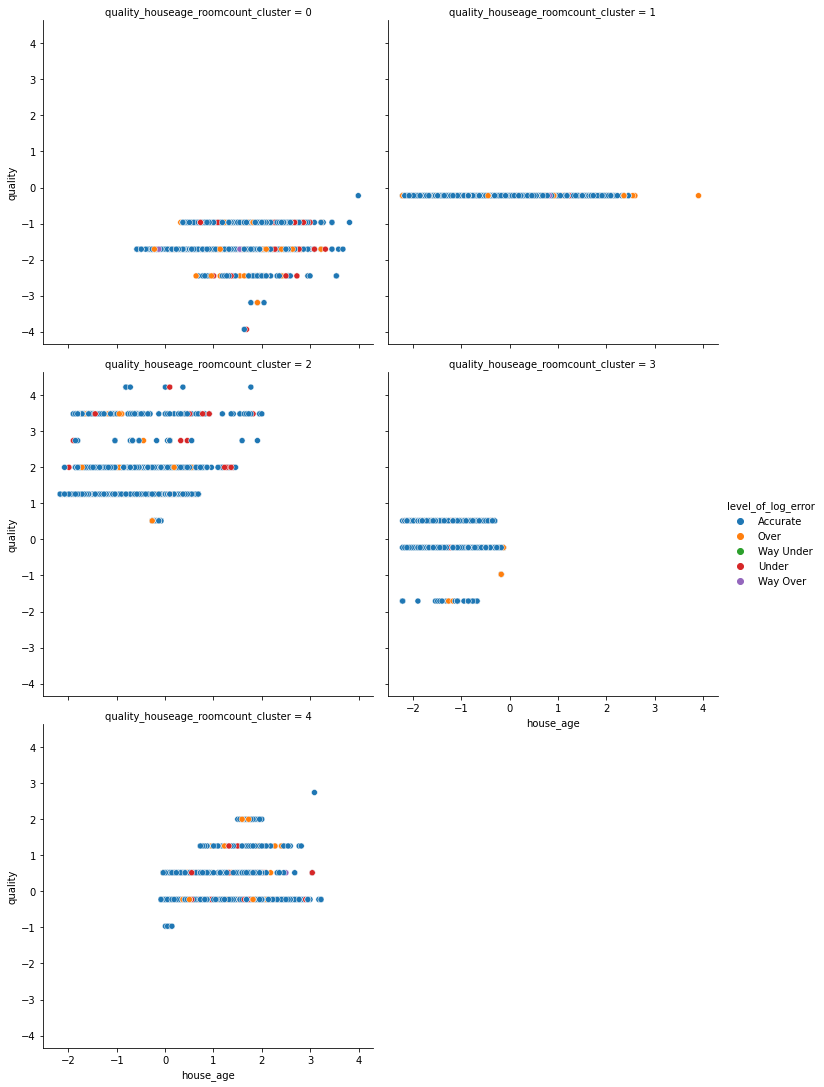

,quality,house_age,room_count,quality_houseage_roomcount_cluster
0,-0.225719,0.684838,-0.549290,4
1,-0.225719,0.458142,0.811344,1
2,-1.708842,1.183571,-0.549290,0
3,-0.225719,-0.176609,-0.549290,3
4,1.257405,-1.174074,-0.549290,2
...,...,...,...,...
33443,-0.225719,0.820856,-0.549290,4
33444,-1.708842,0.866195,-0.549290,0
33445,-0.225719,-1.582128,-0.549290,3
33446,-0.225719,-0.085930,2.512136,1


In [4]:
cluster(train)

In [5]:
def get_dum_and_plot(train):   
    dummy_df =  pd.get_dummies(train['quality_houseage_roomcount_cluster'])
    dummy_df.columns = ['zero', 'one', 'two', 'three', 'four']
    df = pd.concat([train, dummy_df], axis=1)

    df1 = df.groupby(['zero','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df2= df.groupby(['one','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df3= df.groupby(['two','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df4= df.groupby(['three','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df5 = df.groupby(['four','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    
    # Plot the clusters
    plt.figure(figsize=(20, 40))

    
    plt.subplot(5,1,1)
    plt.title("Percents of Each Log Error Level for Homeq = 0", size=20, color='black')

    sns.barplot(y=df.zero, x='level_of_log_error', data=df,

                   palette='viridis')

    plt.subplot(5,1,2)
    plt.title("Percents of Each Log Error Level Older Homes Low Quality", size=20, color='black')
    sns.barplot(y=df.one, x='level_of_log_error', data=df,
                   palette='viridis')

    plt.subplot(5,1,3)
    plt.title("Percents of Each Log Error Level Younger Homes Avg. Quality", size=20, color='black')
    sns.barplot(y=df.two, x='level_of_log_error', data=df,
                   palette='viridis')

    plt.subplot(5,1,4)
    plt.title("Percents of Each Log Error Level Newer Homes High Quality", size=20, color='black')
    sns.barplot(y=df.three, x='level_of_log_error', data=df,
                   palette='viridis')
    
    plt.subplot(5,1,5)
    plt.title("Percents of Each Log Error Level Older Homes High Quality", size=20, color='black')
    sns.barplot(y=df.four, x='level_of_log_error', data=df,
                   palette='viridis')
    
    return df

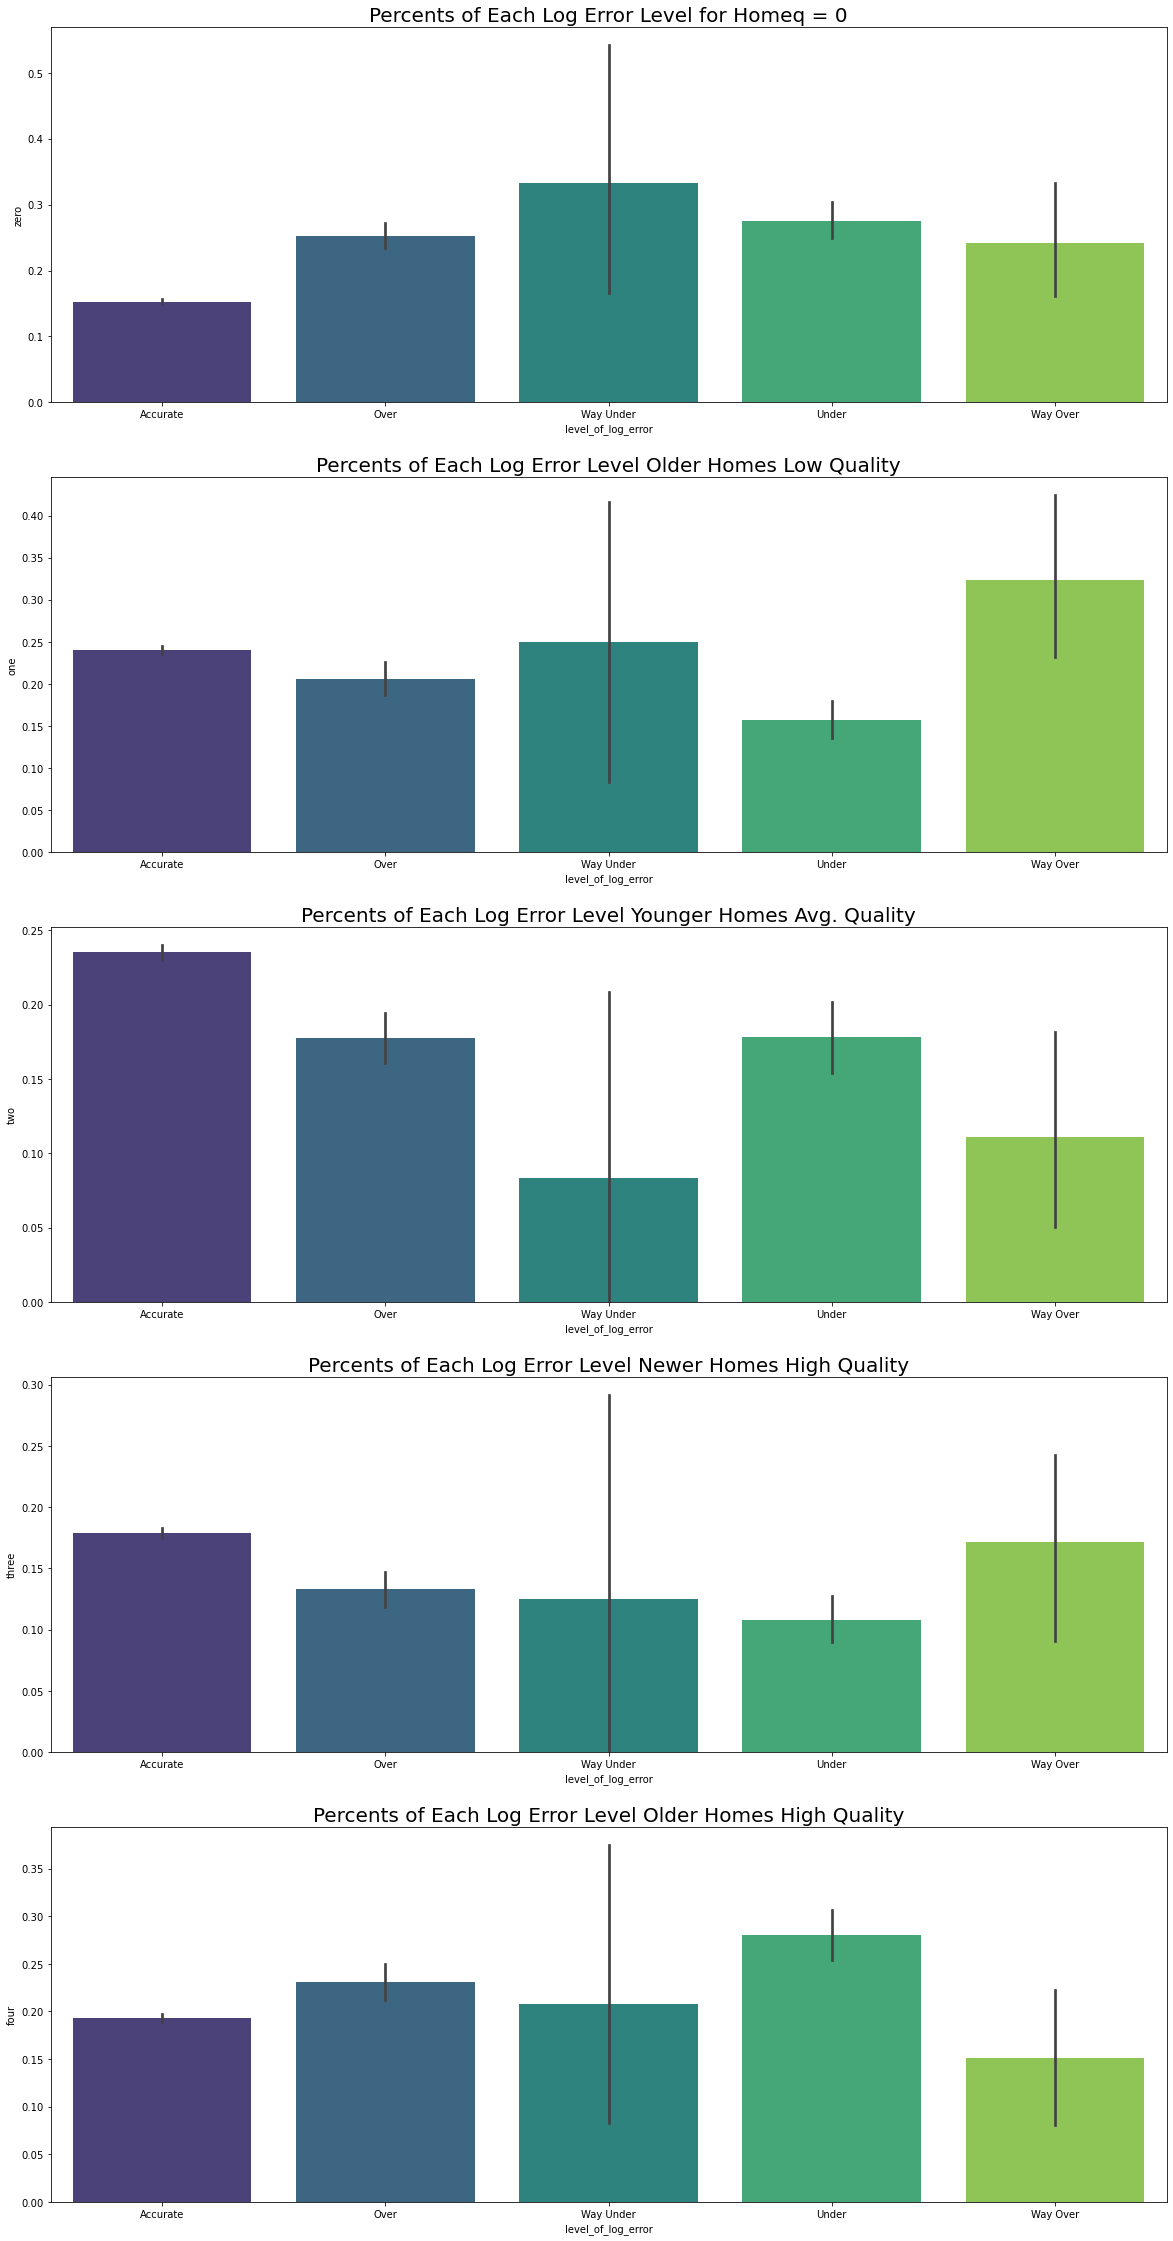

In [6]:
df = get_dum_and_plot(train)

In [7]:
df.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins,quality_houseage_roomcount_cluster,zero,one,two,three,four
0,12397645,261.0,1,2.0,3.0,6.0,1139.0,6037.0,0.0,2.0,...,Accurate,1k-1.5k,0-10k,0-15,4,0,0,0,0,1
1,13899643,261.0,0,1.0,2.0,6.0,882.0,6059.0,0.0,1.0,...,Accurate,500-1k,0-10k,0-15,1,0,1,0,0,0
2,10936804,261.0,1,1.0,2.0,4.0,943.0,6037.0,0.0,1.0,...,Accurate,500-1k,0-10k,0-15,0,1,0,0,0,0
3,12877473,261.0,1,3.0,5.0,6.0,1449.0,6037.0,0.0,3.0,...,Over,1k-1.5k,0-10k,0-15,3,0,0,0,1,0
4,11190920,261.0,1,2.0,4.0,8.0,1546.0,6037.0,0.0,2.0,...,Accurate,1.5l-2k,0-10k,0-15,2,0,0,1,0,0


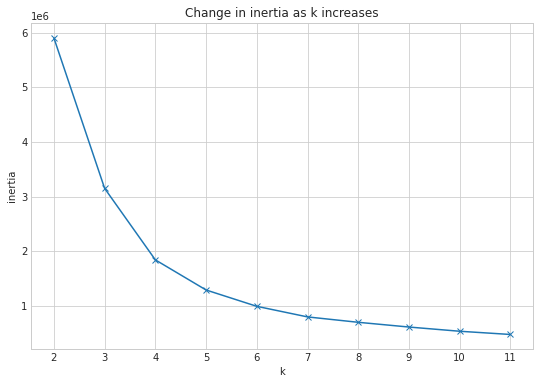

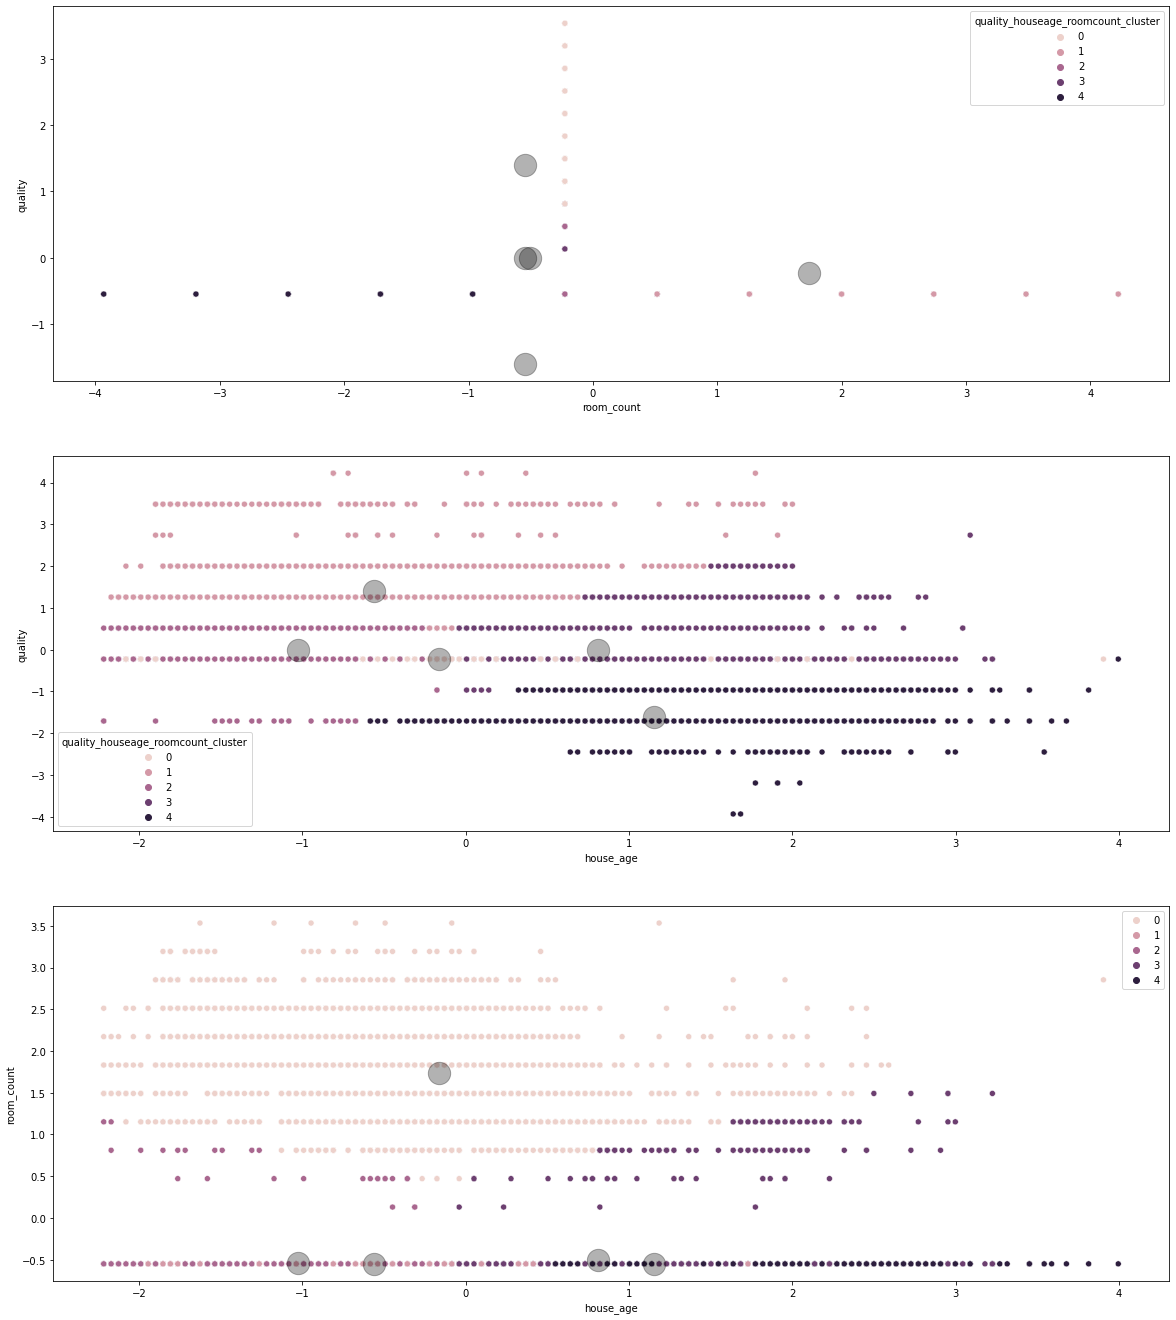

<Figure size 1008x648 with 0 Axes>

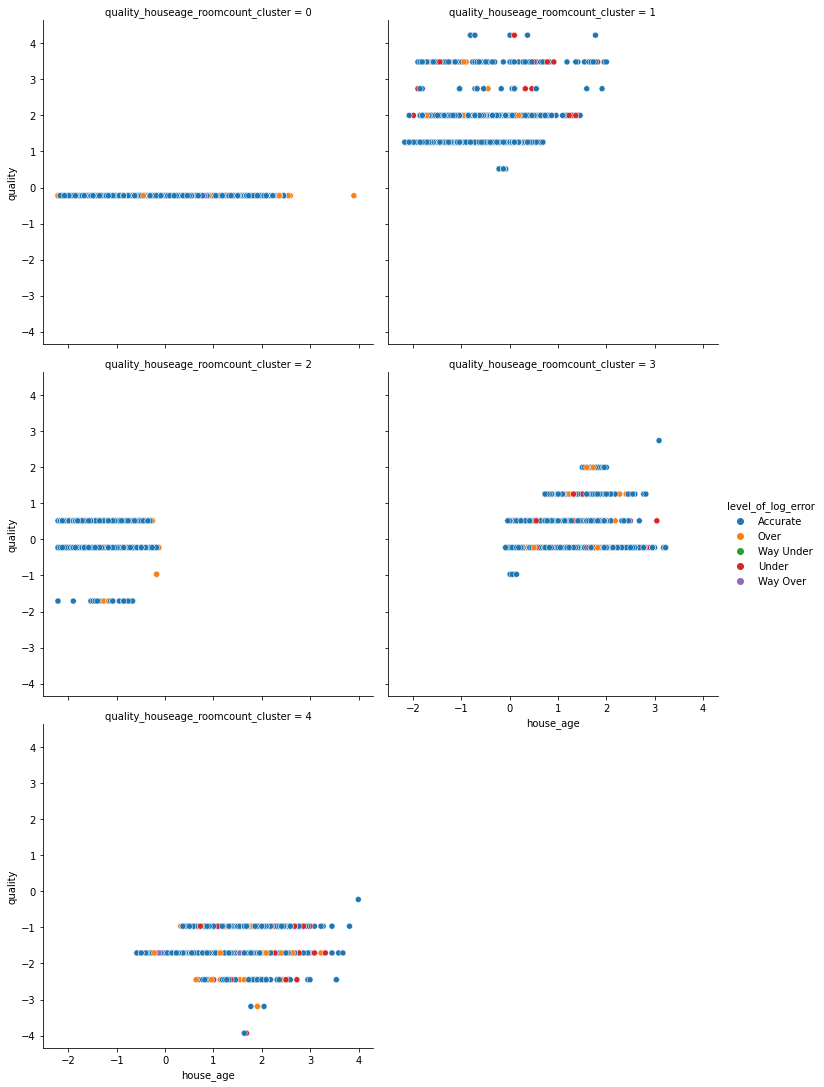

In [8]:
X_scaled = cluster(train)

In [9]:
train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins,quality_houseage_roomcount_cluster
0,12397645,261.0,1,2.0,3.0,6.0,1139.0,6037.0,0.0,2.0,...,0,0,70.0,77.088243,0.115886,Accurate,1k-1.5k,0-10k,0-15,3
1,13899643,261.0,0,1.0,2.0,6.0,882.0,6059.0,0.0,1.0,...,1,0,65.0,99.593289,0.094582,Accurate,500-1k,0-10k,0-15,0
2,10936804,261.0,1,1.0,2.0,4.0,943.0,6037.0,0.0,1.0,...,0,0,81.0,91.300853,0.163522,Accurate,500-1k,0-10k,0-15,4
3,12877473,261.0,1,3.0,5.0,6.0,1449.0,6037.0,0.0,3.0,...,0,0,51.0,77.842486,0.141919,Over,1k-1.5k,0-10k,0-15,2
4,11190920,261.0,1,2.0,4.0,8.0,1546.0,6037.0,0.0,2.0,...,0,0,29.0,51.992135,0.195294,Accurate,1.5l-2k,0-10k,0-15,1


In [10]:
quality_houseage_roomcount_clusters_mean = (df.zero.mean() + df.one.mean() + df.two.mean() + df.three.mean() + df.four.mean())

In [11]:
clusters_population_mean = quality_houseage_roomcount_clusters_mean/5

In [12]:
t0, p0 = stats.ttest_1samp(df.zero, clusters_population_mean)
t1, p1 = stats.ttest_1samp(df.one, clusters_population_mean)
t2, p2 = stats.ttest_1samp(df.two, clusters_population_mean)
t3, p3 = stats.ttest_1samp(df.three, clusters_population_mean)
t4, p4 = stats.ttest_1samp(df.four, clusters_population_mean)

In [13]:


stats = {
    'Cluster': [df.zero,df.one,df.two,df.three,df.four],
    't_statistic': [t0, t1, t2, t3, t4],
    'p-value': [p0, p1, p2, p3, p4]
}

T_test_results = pd.DataFrame(stats)
T_test_results

,Cluster,t_statistic,p-value
0,0 0 1 0 2 1 3 0 4 ...,-18.449648,1.246857e-75
1,0 0 1 1 2 0 3 0 4 ...,15.484157,6.831090e-54
2,0 0 1 0 2 0 3 0 4 ...,12.875623,7.595411e-38
3,0 0 1 0 2 0 3 1 4 ...,-12.450260,1.671058e-35
4,0 1 1 0 2 0 3 0 4 ...,-1.148175,2.509045e-01


In [20]:
# Keep:
# Cluster 1 = house quality = 0
# Cluster 4 = Newer Homes High Quality
# Cluster 5 = Older Homes High Quality

# Drop:
# Cluster 2 = Older Homes low quality
# Cluster 3 = Younger Homes avg. quality

In [18]:
from scipy import stats
null_hypo = 'There is no signficant difference between the log error means of each individual cluster.'
alt_hypo = 'There is a signficant difference between the log error means of at least one of the 3 clusters.'
alpha = 0.05
F, p = stats.f_oneway(train[X_scaled.quality_houseage_roomcount_cluster == 0].logerror,
                      train[X_scaled.quality_houseage_roomcount_cluster == 1].logerror,
                      train[X_scaled.quality_houseage_roomcount_cluster == 2].logerror,
                      train[X_scaled.quality_houseage_roomcount_cluster == 3].logerror)

In [19]:
if p < alpha:
    print('We reject the null hypothesis:\n',null_hypo, '\n')
    print('We continue forward with our alternative hypothesis:\n', alt_hypo,'\n')
else:
    print('We fail to reject the null hypothesis\n:', null_hypo,'\n')
    print('We stop here\n')
print('Anova Test Results on house_age and quality and roomcount Cluster')
print('Our F-value:\n',F)
print('Our P-value:\n',p)

We reject the null hypothesis:
 There is no signficant difference between the log error means of each individual cluster. 

We continue forward with our alternative hypothesis:
 There is a signficant difference between the log error means of at least one of the 3 clusters. 

Anova Test Results on house_age and quality and roomcount Cluster
Our F-value:
 6.392670850075067
Our P-value:
 0.0002519238409642035
